In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 10]

# setup
regions = ['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands', 'West Midlands', 'East', 'London', 'South East', 'South West', 'Wales', 'Scotland', 'Northern Ireland']
boroughs = ['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']

usefont = "Proxima Nova"
usefontsizesmallertitle = 14 # for daliy death (animated)
usefontsizelarge = 22
usefontsizelargish = 16
# graphcolours = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c'] # fivethirtyeight colours
# graphcolours = ['#fc4f30', '#647def', '#F1C40F', '#810f7c', '#5FAD56', '#cc8400', '#c37cdb', '#b24a5f', '#2274A5']
# graphcolours= ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628", "#F781BF", "#999999"]
graphcolours = ['#5DA5DA', '#FAA43A', '#60BD67', '#F27CAF', '#B3912F', '#B275B2', '#DECF3E', '#F25854', '#4D4D4D']
startoncolourx = 7

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', graphcolours)
plt.rc('axes', titlesize=usefontsizelargish)  # fontsize of the figure title
plt.rc('font',**{'family':'serif','serif':[usefont]})

# access data
london_earnings_by_borough = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_earnings_by_borough.csv')
london_economic_activity = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_economic_activity.csv')
#london_infrastructure_spending = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_infrastructure_spending.csv')
london_sports_participation = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_sports_participation.csv')
london_taxpayer_income = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_taxpayer_income.csv')
london_ticket_sales = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_ticket_sales.csv')
#london_tickets_for_sale = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_tickets_for_sale.csv')
london_underground_activity = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_underground_activity.csv')
london_underground_station_info = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/london_underground_station_info.csv')
UK_inflation = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/UK_inflation.csv')
UK_international_visits = pd.read_csv(r'/Users/bertie/Downloads/datasets_full/London/UK_international-visits.csv')

dflist = [london_earnings_by_borough,london_economic_activity,london_sports_participation,london_taxpayer_income,london_ticket_sales,london_underground_activity,london_underground_station_info,UK_inflation,UK_international_visits]

london_earnings_by_borough_headers = [i for i in london_earnings_by_borough]

#for j in dflist:
#    for i in j:
#        print(i)

/Users/bertie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Male Earnings (split by region)


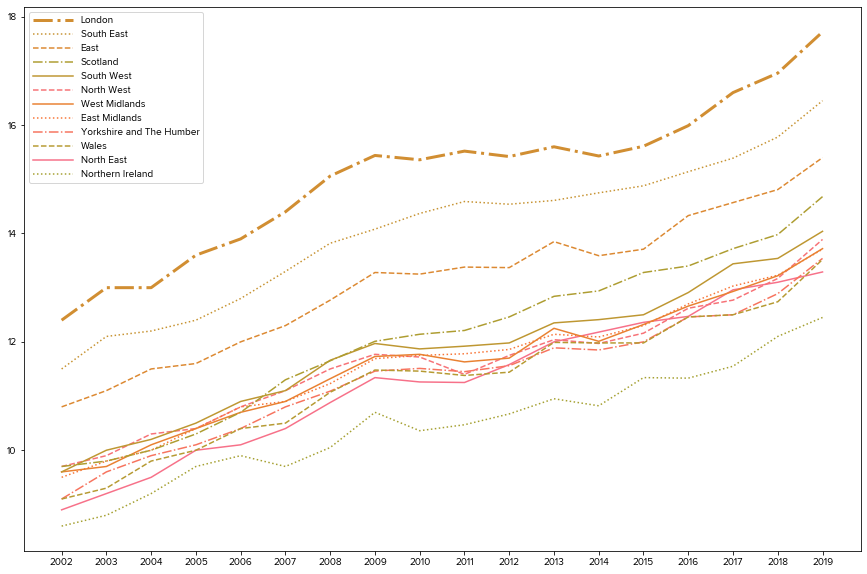

Male Earnings (split by region)


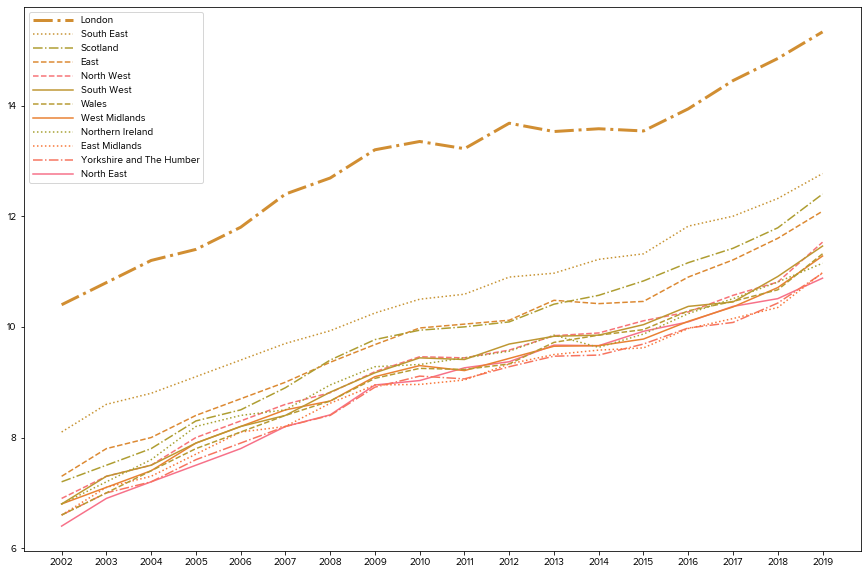

Male Earnings (split by region)


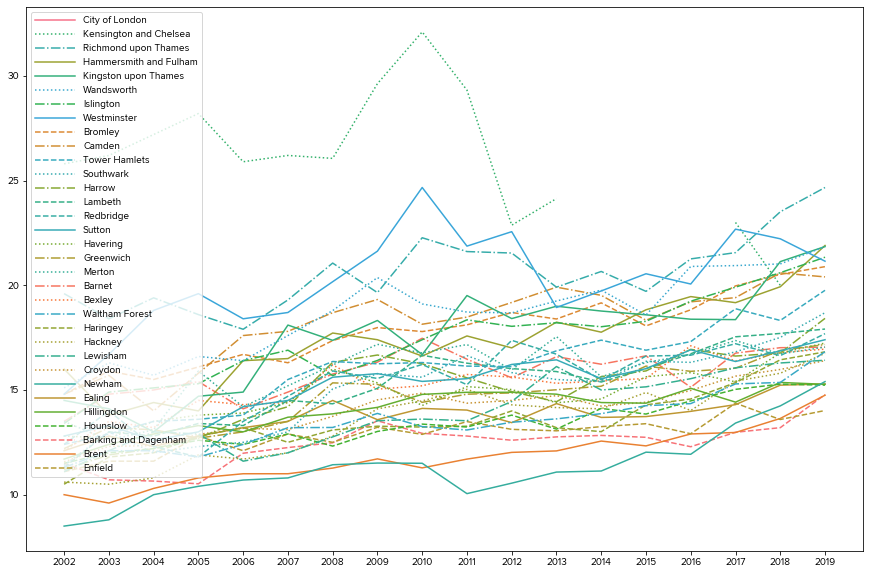

2019
                   Borough   2002   2003   2004   2005   2006   2007   2008  \
0           City of London    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     Barking and Dagenham   11.5  10.71  10.65  10.52  11.98  12.25  12.48   
2                   Barnet   13.5   14.8     15   15.4   14.1   14.9  15.76   
3                   Bexley   12.1   13.5   13.2   14.5   14.3   14.4   16.2   
4                    Brent     10    9.6   10.3   10.8     11     11  11.27   
5                  Bromley   14.8   15.9   15.5   16.1   16.7   16.3  17.36   
6                   Camden   14.8   15.7     14   15.8   17.6   17.8  18.69   
7                  Croydon  11.57  12.31  12.34  12.88  13.17  13.11  13.74   
8                   Ealing   12.1   12.8   12.3   12.8   13.2   13.5   14.5   
9                  Enfield   11.1   11.6   11.6   12.8   12.1   12.9   12.5   
10               Greenwich   12.2   13.2   13.1   12.7     13   13.5  15.34   
11                 Hackney   10.6   10.5   10.8

IndexError: list index out of range

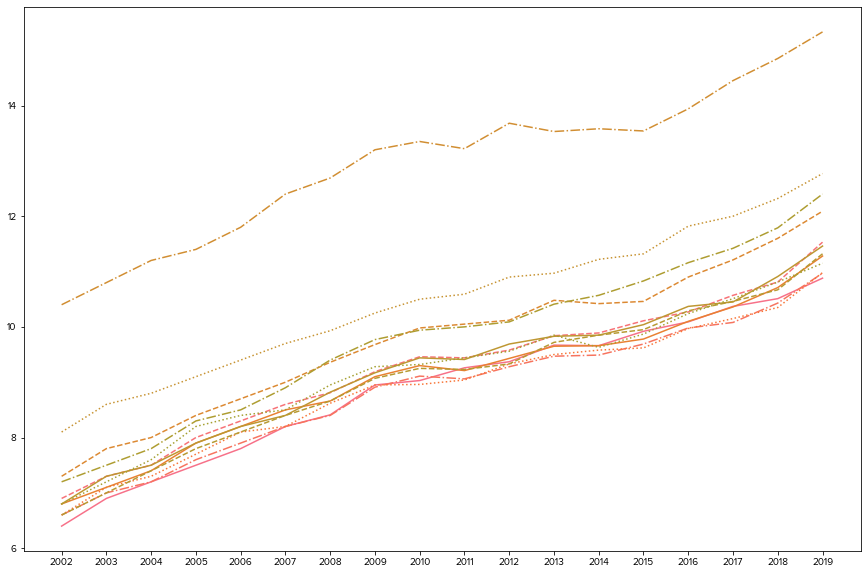

In [100]:
NUM_COLORS = 50
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)

sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)  # a list of RGB tuples
fig, ax = plt.subplots(1)

j=0
recentdata = []
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Male' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in regions:
        if dflist[0]['area'].values[i*18] == 'London':
            lines = ax.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],lw=3, label=dflist[0]['area'].values[i*18])
            lines[0].set_color(clrs[j])
            lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
            recentdata.append(dflist[0]['pay'].values[(i+1)*18-1])
        else:
            lines = ax.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18], label=dflist[0]['area'].values[i*18])
            lines[0].set_color(clrs[j])
            lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
            recentdata.append(dflist[0]['pay'].values[(i+1)*18-1])
        j += 1
order = np.argsort(recentdata)[::-1]
plt.xticks(dflist[0]['year'].values[0:18])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left",handlelength=4)
print('Male Earnings (split by region)')
plt.show()

sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)  # a list of RGB tuples
fig, ax = plt.subplots(1)

j=0
recentdata = []
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Female' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in regions:
        if dflist[0]['area'].values[i*18] == 'London':
            lines = ax.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],lw=3, label=dflist[0]['area'].values[i*18])
            lines[0].set_color(clrs[j])
            lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
            recentdata.append(dflist[0]['pay'].values[(i+1)*18-1])
        else:
            lines = ax.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18], label=dflist[0]['area'].values[i*18])
            lines[0].set_color(clrs[j])
            lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
            recentdata.append(dflist[0]['pay'].values[(i+1)*18-1])
        j += 1
order = np.argsort(recentdata)[::-1]
plt.xticks(dflist[0]['year'].values[0:18])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left",handlelength=4)
print('Male Earnings (split by region)')
plt.show()

sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)  # a list of RGB tuples
fig, ax = plt.subplots(1)

j=0
recentdata = []
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Male' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in boroughs:
        if dflist[0]['area'].values[i*18] == 'London':
            lines = ax.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],lw=3, label=dflist[0]['area'].values[i*18])
            lines[0].set_color(clrs[j])
            lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
            recentdata.append(dflist[0]['pay'].values[(i+1)*18-1])
        else:
            lines = ax.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18], label=dflist[0]['area'].values[i*18])
            lines[0].set_color(clrs[j])
            lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
            recentdata.append(dflist[0]['pay'].values[(i+1)*18-1])
        j += 1
order = np.argsort(recentdata)[::-1]
plt.xticks(dflist[0]['year'].values[0:18])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left",handlelength=4)
print('Male Earnings (split by region)')
plt.show()


######################################################



























######################################################
fig, ax = plt.subplots(1)
j=0
recentdata = []
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Female' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in regions:
        if dflist[0]['area'].values[i*18] == 'London':
            lines = plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'--')
            lines[0].set_color(clrs[j])
            lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
            recentdata.append(dflist[0]['pay'].values[(i+1)*18-1])
        else:
            lines = plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'-')
            lines[0].set_color(clrs[j])
            lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
            recentdata.append(dflist[0]['pay'].values[(i+1)*18-1])
        j += 1
order = np.argsort(recentdata)[::-1]
plt.xticks(dflist[0]['year'].values[0:18])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left",handlelength=4)
print('Female Earnings (split by region)')
plt.show()

male = []
male_ldn = []
female = []
female_ldn = []
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Male' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in regions:
        if dflist[0]['area'].values[i*18] == 'London':
            male_ldn.extend(dflist[0]['pay'].values[i*18:(i+1)*18])
        else:
            male.append(dflist[0]['pay'].values[i*18:(i+1)*18])
            
    if dflist[0]['identity'].values[i*18] == 'Female' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in regions:
        if dflist[0]['area'].values[i*18] == 'London':
            female_ldn.extend(dflist[0]['pay'].values[i*18:(i+1)*18])
        else:
            female.append(dflist[0]['pay'].values[i*18:(i+1)*18])

for i in range(len(male)):
    plt.plot(dflist[0]['year'].values[0:18], [male[i][j]-female[i][j] for j in range(18)],'-')
plt.plot(dflist[0]['year'].values[0:18], [male_ldn[j]-female_ldn[j] for j in range(18)],'--')
plt.xticks(dflist[0]['year'].values[0:18])
plt.legend(loc="upper left")
print('Earnings difference (male - female, split by region)')
plt.show()


for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Full-time' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in regions:
        if dflist[0]['area'].values[i*18] == 'London':
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'--')
        else:
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'-')
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Part-time' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in regions:
        if dflist[0]['area'].values[i*18] == 'London':
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'--',alpha=0.5)
        else:
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'-',alpha=0.5)
plt.xticks(dflist[0]['year'].values[0:18])
plt.legend(loc="upper left")
print('Full-time (bold) and Part-time (faint) Earnings (split by region)')
plt.show()


Male Earnings (split by region)


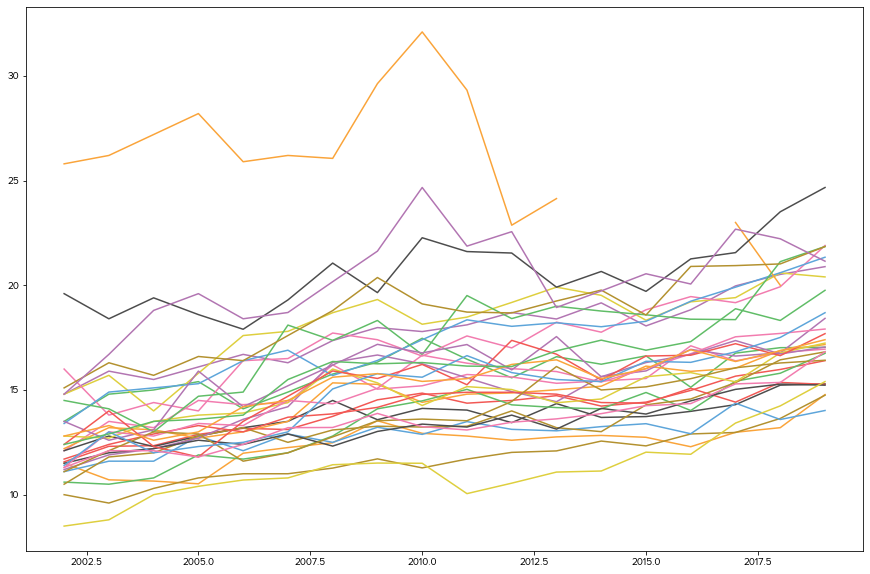

Female Earnings (split by region)


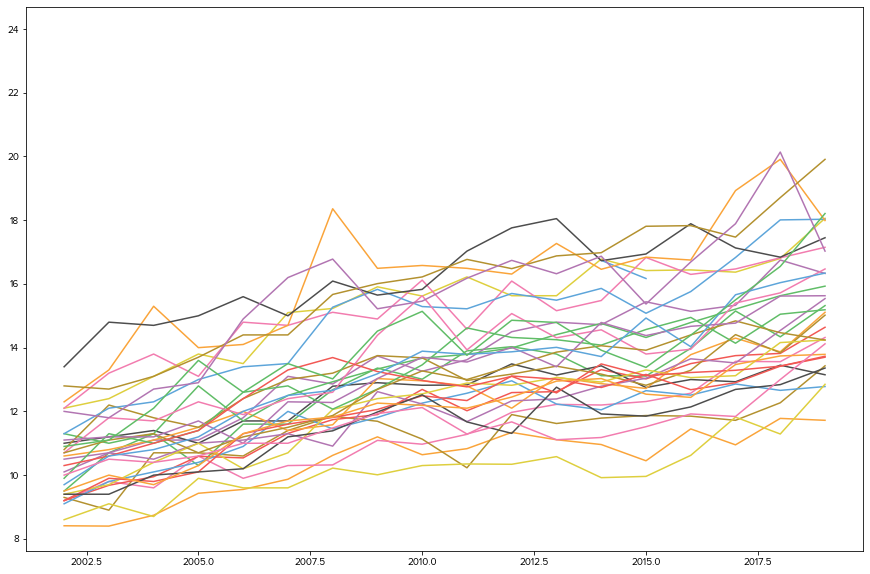

[nan, nan, nan, nan, nan, nan, nan, 9.16, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[3.09, 2.3100000000000005, 1.9100000000000001, 1.0899999999999999, 2.4299999999999997, 2.380000000000001, 1.8600000000000012, 2.33, 2.289999999999999, 1.9700000000000006, 1.2599999999999998, 1.6500000000000004, 1.8699999999999992, 2.290000000000001, 0.8399999999999999, 2.030000000000001, 1.42, 3.0599999999999987]
[4.0, 4.100000000000001, 3.6999999999999993, 5.1, 2.5, 3.3000000000000007, 3.08, 2.969999999999999, 4.459999999999999, 2.5699999999999985, 1.5500000000000007, 2.789999999999999, 3.110000000000001, 3.5199999999999996, 1.1500000000000004, 1.6100000000000012, 2.6799999999999997, 1.7199999999999989]
[2.9000000000000004, 3.6999999999999993, 3.5999999999999996, 3.9000000000000004, 4.4, 4.1, 5.879999999999999, 3.9499999999999993, 4.229999999999999, 4.460000000000001, 3.6499999999999986, 3.0999999999999996, 3.2300000000000004, 3.24, 4.539999999999999, 2.8200000000000003, 3.2299999999999986, 2.6

IndexError: list index out of range

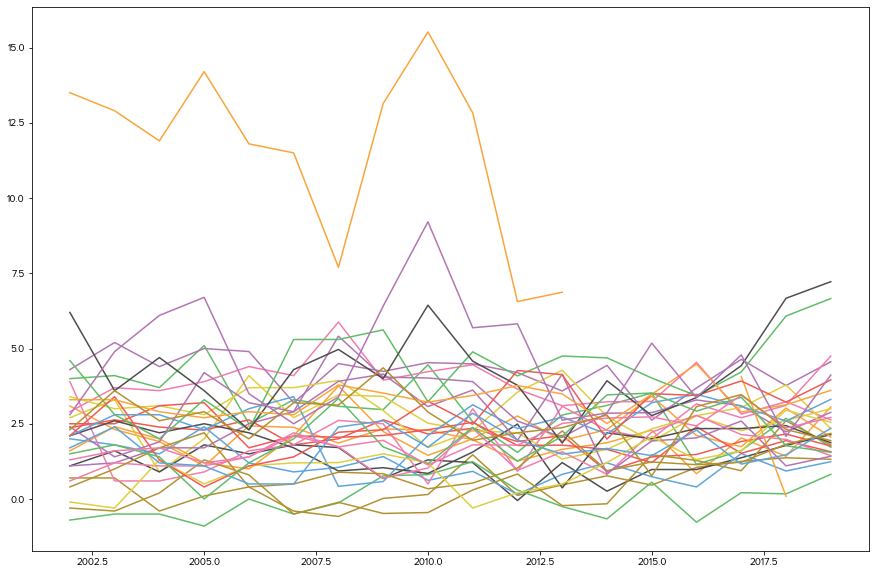

In [50]:
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Male' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in boroughs:
        if dflist[0]['area'].values[i*18] == 'London':
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'--')
        else:
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'-')
print('Male Earnings (split by region)')
plt.show()

for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Female' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in boroughs:
        if dflist[0]['area'].values[i*18] == 'London':
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'--')
        else:
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'-')
print('Female Earnings (split by region)')
plt.show()

male = []
male_ldn = []
female = []
female_ldn = []
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Male' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in boroughs:
        if dflist[0]['area'].values[i*18] == 'London':
            male_ldn.extend(dflist[0]['pay'].values[i*18:(i+1)*18])
        else:
            male.append(dflist[0]['pay'].values[i*18:(i+1)*18])
            
    if dflist[0]['identity'].values[i*18] == 'Female' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in boroughs:
        if dflist[0]['area'].values[i*18] == 'London':
            female_ldn.extend(dflist[0]['pay'].values[i*18:(i+1)*18])
        else:
            female.append(dflist[0]['pay'].values[i*18:(i+1)*18])

for i in range(len(male)):
    print([male[i][j]-female[i][j] for j in range(18)])
    plt.plot(dflist[0]['year'].values[0:18], [male[i][j]-female[i][j] for j in range(18)],'-')
plt.plot(dflist[0]['year'].values[0:18], [male_ldn[j]-female_ldn[j] for j in range(18)],'--')
print('Earnings difference (male - female, split by region)')
plt.show()


for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Full-time' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in boroughs:
        if dflist[0]['area'].values[i*18] == 'London':
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'--')
        else:
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'-')
for i in range(int(dflist[0].shape[0]/18)):
    if dflist[0]['identity'].values[i*18] == 'Part-time' and dflist[0]['pay_type'].values[i*18] == 'Hourly' and dflist[0]['area'].values[i*18] in boroughs:
        if dflist[0]['area'].values[i*18] == 'London':
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'--',alpha=0.5)
        else:
            plt.plot(dflist[0]['year'].values[i*18:(i+1)*18], dflist[0]['pay'].values[i*18:(i+1)*18],'-',alpha=0.5)
print('Full-time (bold) and Part-time (faint) Earnings (split by region)')
plt.show()


In [101]:
earnings_data = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for year in range(18):
    for area in range(int(dflist[0].shape[0]/18)):
        if dflist[0]['identity'].values[area*18+year] == 'Male' and dflist[0]['pay_type'].values[area*18+year] == 'Hourly' and dflist[0]['area'].values[area*18+year] in boroughs:
            if year == 0:
                earnings_data[0].append(dflist[0]['area'].values[area*18])
            earnings_data[year+1].append(dflist[0]['pay'].values[area*18+year])
df = pd.DataFrame(earnings_data).transpose()
headers = ['Borough']
for i in range(18):
    headers.append(str(2002+i))
df.columns = headers
print(dflist[0]['year'].values[year])
print (df)
df.to_csv('male_borough_earnings.csv'.format(dflist[0]['year'].values[year]), sep=',')

2019
                   Borough   2002   2003   2004   2005   2006   2007   2008  \
0           City of London    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     Barking and Dagenham   11.5  10.71  10.65  10.52  11.98  12.25  12.48   
2                   Barnet   13.5   14.8     15   15.4   14.1   14.9  15.76   
3                   Bexley   12.1   13.5   13.2   14.5   14.3   14.4   16.2   
4                    Brent     10    9.6   10.3   10.8     11     11  11.27   
5                  Bromley   14.8   15.9   15.5   16.1   16.7   16.3  17.36   
6                   Camden   14.8   15.7     14   15.8   17.6   17.8  18.69   
7                  Croydon  11.57  12.31  12.34  12.88  13.17  13.11  13.74   
8                   Ealing   12.1   12.8   12.3   12.8   13.2   13.5   14.5   
9                  Enfield   11.1   11.6   11.6   12.8   12.1   12.9   12.5   
10               Greenwich   12.2   13.2   13.1   12.7     13   13.5  15.34   
11                 Hackney   10.6   10.5   10.8

In [103]:
earnings_data = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for year in range(15):
    for area in range(int(dflist[1].shape[0]/15)):
        if dflist[1]['gender'].values[area*15+year] == 'M' and dflist[1]['area'].values[area*15+year] in boroughs:
            if year == 0:
                earnings_data[0].append(dflist[1]['area'].values[area*15])
            earnings_data[year+1].append(dflist[1]['percent'].values[area*15+year])
df = pd.DataFrame(earnings_data).transpose()
headers = ['Borough']
for i in range(15):
    headers.append(str(2005+i))
df.columns = headers
print(dflist[1]['year'].values[year][4:8])
print(df)
df.to_csv('male_borough_employment.csv'.format(dflist[0]['year'].values[year]), sep=',')

2019
                   Borough  2005  2006  2007  2008  2009  2010  2011  2012  \
0           City of London    87  62.9   100  91.3  88.2   NaN   NaN   NaN   
1     Barking and Dagenham    79  77.1  83.1  80.3  80.3  85.2  81.1  83.2   
2                   Barnet  81.5  81.3  78.9  80.6  81.7  80.9  85.3  79.7   
3                   Bexley  86.2  85.5    83  83.4  82.3  82.9  81.5  85.2   
4                    Brent    83  81.4  84.3  84.5  83.6  78.2  75.9  80.9   
5                  Bromley  87.7  88.9  90.7  87.2  89.4  83.5  83.3  85.1   
6                   Camden  77.3  80.8  78.4  80.5  77.3  80.7    76  81.6   
7                  Croydon  84.5  84.7  84.8  84.3  83.8  86.8  82.3  85.1   
8                   Ealing  82.1  83.4  82.1  82.6  83.3  81.9  83.4  84.9   
9                  Enfield  84.7    84  80.6  84.9    78  78.9  82.1    81   
10               Greenwich  84.2    79  84.9  80.8  83.3  82.8  84.8  84.3   
11                 Hackney  68.1  76.7    78  77.2  81.3  8

In [123]:
house_prices_borough = pd.read_csv(r'/Users/bertie/Downloads/house-prices-borough.csv')

house_prices_borough = pd.melt(house_prices_borough,id_vars=['Area'], var_name='Date', value_name='House Price')

house_prices_borough.to_csv('house_prices_borough_cleaned.csv'.format(dflist[0]['year'].values[year]), sep=',')

In [143]:
house_prices_borough = pd.read_csv(r'/Users/bertie/Downloads/house-prices-borough.csv')

changes = [[],[]]
for index, borough in house_prices_borough.iterrows():
    changes[0].append(borough.values[0])
    changes[1].append(round(100*(borough.values[78]-borough.values[54])/borough.values[54],2))
    
print(changes)
changesdf = pd.DataFrame(changes).T
changesdf.columns = ['Area','Change in House Price from 2009 to 2015']
changesdf.to_csv('house_price_changes_borough.csv', sep=',')

[['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'], [125.52, 18.76, 48.21, 28.4, 48.13, 40.0, 57.23, 23.6, 60.0, 30.41, 40.66, 60.55, 65.12, 67.2, 44.59, 19.54, 30.86, 31.43, 59.42, 76.24, 41.82, 58.52, 46.07, 56.0, 18.68, 27.02, 51.2, 53.57, 31.11, 37.5, 47.33, 55.09, 85.74]]



 [105000 112500 112375 121500 124250 126503 130000 130000 135000 147000
 155000 160000 169250 175000 175000 180000 180000 180000 186995 191998
 200000 220000 235000 235000 237500 230000 225000 240000 250000 279500
 290000 290000 285000 270000 275000 280000 280000 300000 298725 305000
 310000 312500 315000 323000 337500 355000 375000 395000 416250 423500
 395000 375000 365000 357500 372000 381250 400000 424000 430000 452500
 450000 466250 465000 455000 465000 460000 460000 474000 485000 495000
 550000 575000 615000 625000 640000 700000 769100 806250 814500 823750
 800000 795000 799750 800000 831400 831400 812500 835000 835000] 

[2005.25, 2005.5, 2005.75, 2006.0, 2006.25, 2006.5, 2006.75, 2007.0, 2007.25, 2007.5, 2007.75, 2008.0, 2008.25, 2008.5, 2008.75, 2009.0, 2009.25, 2009.5, 2009.75, 2010.0, 2010.25, 2010.5, 2010.75, 2011.0, 2011.25, 2011.5, 2011.75, 2012.0, 2012.25, 2012.5, 2012.75, 2013.0, 2013.25, 2013.5, 2013.75, 2014.0, 2014.25, 2014.5, 2014.75, 2015.0, 2015.25, 2015.5, 2015.

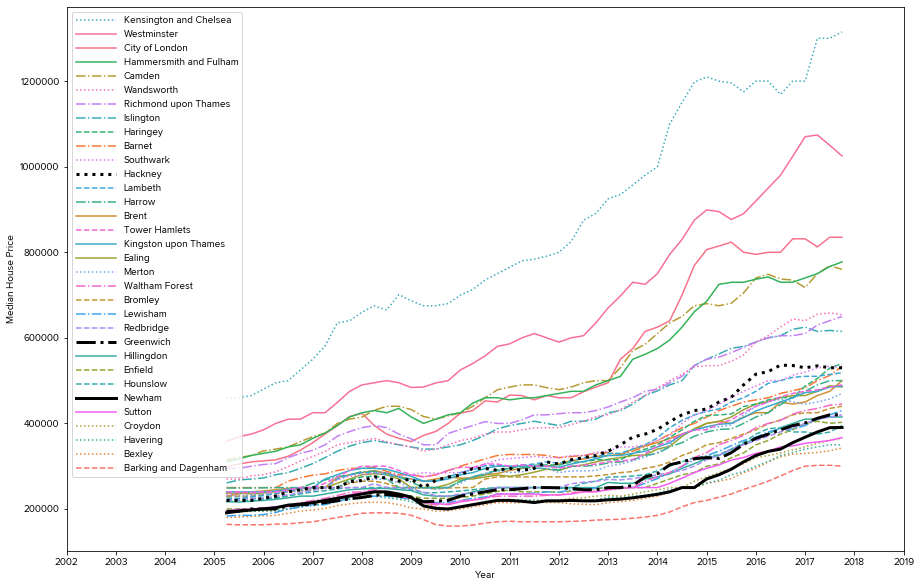

[298725, 164000, 249950, 180000, 230000, 228000, 315000, 190000, 237000, 200000, 194000, 220000, 310000, 220000, 249000, 192000, 217000, 220000, 261000, 460000, 240000, 224500, 183700, 230000, 191000, 220000, 295000, 233000, 196000, 240000, 195000, 270000, 357500]
[2005.25, 2005.5, 2005.75, 2006.0, 2006.25, 2006.5, 2006.75, 2007.0, 2007.25, 2007.5, 2007.75, 2008.0, 2008.25, 2008.5, 2008.75, 2009.0, 2009.25, 2009.5, 2009.75, 2010.0, 2010.25, 2010.5, 2010.75, 2011.0, 2011.25, 2011.5, 2011.75, 2012.0, 2012.25, 2012.5, 2012.75, 2013.0, 2013.25, 2013.5, 2013.75, 2014.0, 2014.25, 2014.5, 2014.75, 2015.0, 2015.25, 2015.5, 2015.75, 2016.0, 2016.25, 2016.5, 2016.75, 2017.0, 2017.25, 2017.5, 2017.75] [0.0, 0.5154639175257785, 3.0927835051546424, 3.0927835051546424, 3.0927835051546424, 6.701030927835049, 8.24484536082474, 8.762886597938149, 10.824742268041234, 12.886597938144334, 15.463917525773198, 17.01030927835052, 19.587628865979383, 20.592783505154642, 18.55670103092784, 17.268041237113408, 

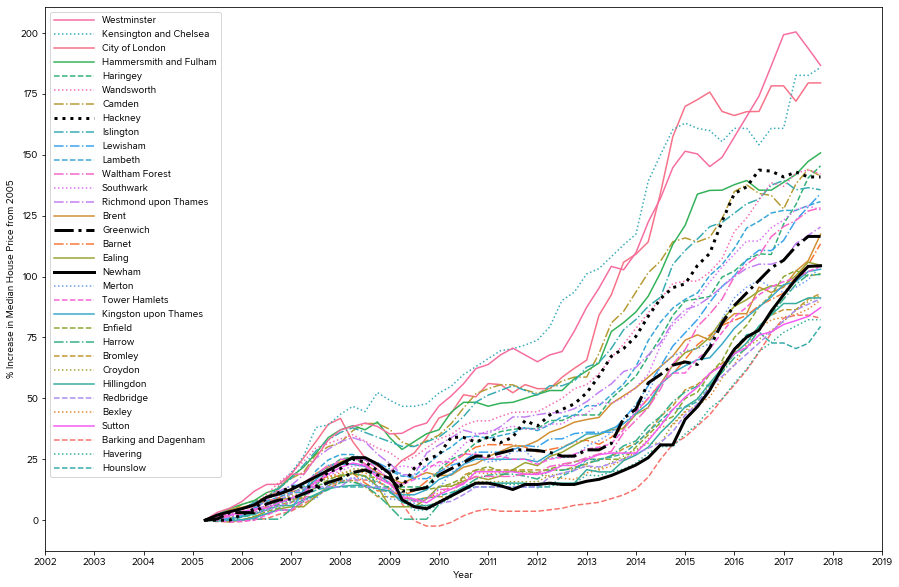

In [197]:
house_prices_borough = pd.read_csv(r'/Users/bertie/Downloads/house-prices-borough.csv')

NUM_COLORS = 33
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)

startingat = 39

sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)  # a list of RGB tuples
fig, ax = plt.subplots(1)

print('\n',house_prices_borough.iloc[[0]].values[0][1:],'\n')
j=0
recentdata = []
for i, borough in house_prices_borough.iterrows():
    if house_prices_borough['Area'].values[i] == 'Newham' or house_prices_borough['Area'].values[i] == 'Hackney' or house_prices_borough['Area'].values[i] == 'Greenwich':
        lines = ax.plot([int(k[:4])+((num+1)%4)/4 for num, k in enumerate(house_prices_borough.columns.values[startingat:])], house_prices_borough.iloc[[i]].values[0][startingat:], 'k',lw=3, label=house_prices_borough.iloc[[i]].values[0][0],zorder=10)
        print([int(k[:4])+((num+1)%4)/4 for num, k in enumerate(house_prices_borough.columns.values[startingat:])], house_prices_borough.iloc[[i]].values[0][startingat:])
        lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
        recentdata.append(house_prices_borough.iloc[[i]].values[0][-1])
    else:
        lines = ax.plot([int(k[:4])+((num+1)%4)/4 for num, k in enumerate(house_prices_borough.columns.values[startingat:])], house_prices_borough.iloc[[i]].values[0][startingat:], label=house_prices_borough.iloc[[i]].values[0][0],zorder=0)
        lines[0].set_color(clrs[j])
        lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
        recentdata.append(house_prices_borough.iloc[[i]].values[0][-1])
    j += 1
order = np.argsort(recentdata)[::-1]
plt.xticks(dflist[0]['year'].values[0:18])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left",handlelength=4)
plt.ylabel ('Median House Price')
plt.xlabel ('Year')
print('House Prices (split by region)')
plt.show()

sns.reset_orig()  # get default matplotlib styles back
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)  # a list of RGB tuples
fig, ax = plt.subplots(1)

j=0
originaldata = []
for i, borough in house_prices_borough.iterrows():
    originaldata.append(house_prices_borough.iloc[[i]].values[0][startingat])
print(originaldata)
recentdata = []
for i, borough in house_prices_borough.iterrows():
    if house_prices_borough['Area'].values[i] == 'Newham' or house_prices_borough['Area'].values[i] == 'Hackney' or house_prices_borough['Area'].values[i] == 'Greenwich':
        lines = ax.plot([int(k[:4])+((num+1)%4)/4 for num, k in enumerate(house_prices_borough.columns.values[startingat:])], [100*k/originaldata[i]-100 for num,k in enumerate(house_prices_borough.iloc[[i]].values[0][startingat:])], 'k',lw=3, label=house_prices_borough.iloc[[i]].values[0][0],zorder=10)
        print([int(k[:4])+((num+1)%4)/4 for num, k in enumerate(house_prices_borough.columns.values[startingat:])], [100*k/originaldata[i]-100 for num,k in enumerate(house_prices_borough.iloc[[i]].values[0][startingat:])])
        lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
        recentdata.append(house_prices_borough.iloc[[i]].values[0][-1]/originaldata[i])
    else:
        lines = ax.plot([int(k[:4])+((num+1)%4)/4 for num, k in enumerate(house_prices_borough.columns.values[startingat:])], [100*k/originaldata[i]-100 for num,k in enumerate(house_prices_borough.iloc[[i]].values[0][startingat:])], label=house_prices_borough.iloc[[i]].values[0][0],zorder=0)
        lines[0].set_color(clrs[j])
        lines[0].set_linestyle(LINE_STYLES[j%NUM_STYLES])
        recentdata.append(house_prices_borough.iloc[[i]].values[0][-1]/originaldata[i])
    j += 1
print(recentdata)
order = np.argsort(recentdata)[::-1]
plt.xticks(dflist[0]['year'].values[0:18])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper left",handlelength=4)
plt.ylabel ('% Increase in Median House Price from 2005')
plt.xlabel ('Year')
print('House Prices % Increase (split by region)')
plt.show()